In [18]:
import pandas as pd
import numpy as np
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

iris_data = pd.read_csv('iris-data.csv')
#iris_data.head()

iris_data = pd.read_csv('iris-data.csv', na_values=['NA'])

iris_data.describe()

iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

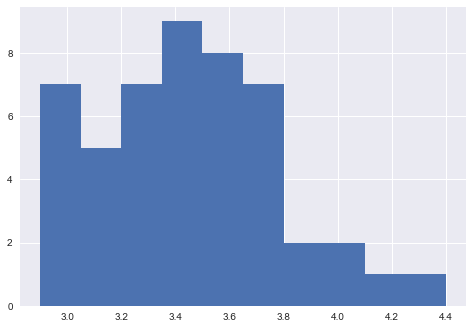

In [2]:
# This line drops any 'Iris-setosa' rows with a separal width less than 2.5 cm
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

//anaconda/lib/python2.7/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


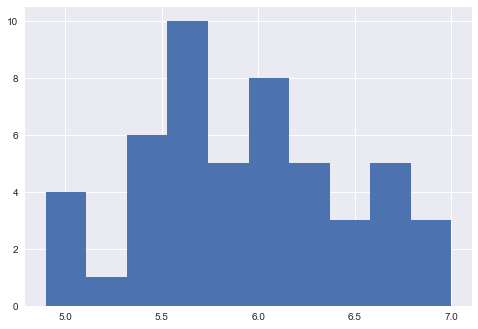

In [3]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]

iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

In [4]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


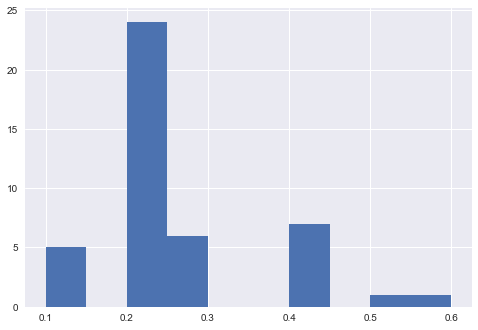

In [5]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

In [6]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [7]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [8]:
iris_data.to_csv('iris-data-clean.csv', index=False)

iris_data_clean = pd.read_csv('iris-data-clean.csv')

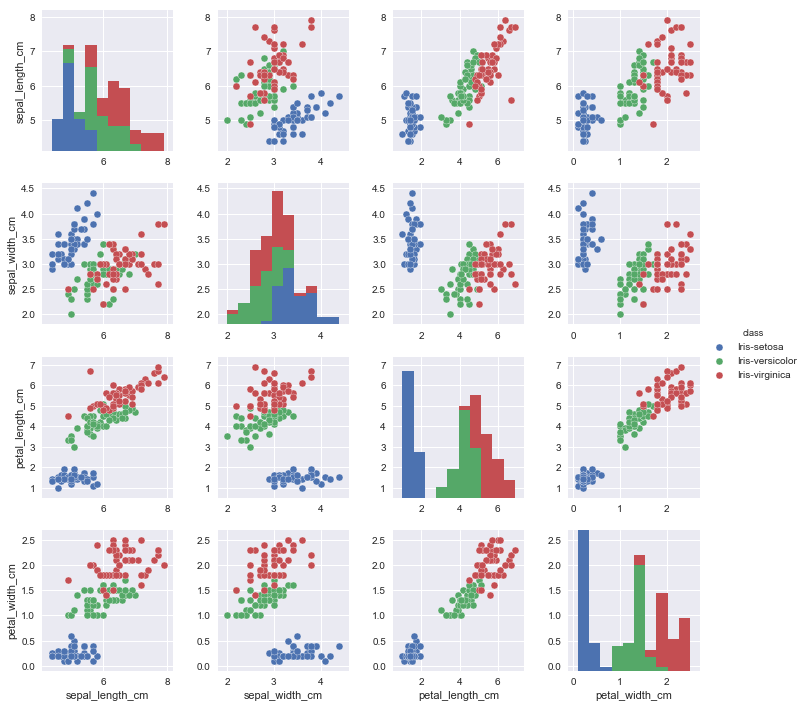

In [10]:
sb.pairplot(iris_data_clean,hue='class')
plt.show()

## training set: random subset of the data used to train our models.
## testing set: random subset of the data (mutually exclusive from the training set) used to validate our models.

In [11]:
all_inputs = iris_data_clean[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']].values

all_classes = iris_data_clean['class'].values

In [12]:
from sklearn.cross_validation import train_test_split

(training_inputs,
testing_inputs,
training_classes,
testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1)

# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# create a classifier
decision_tree_classifier = DecisionTreeClassifier()

# train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)


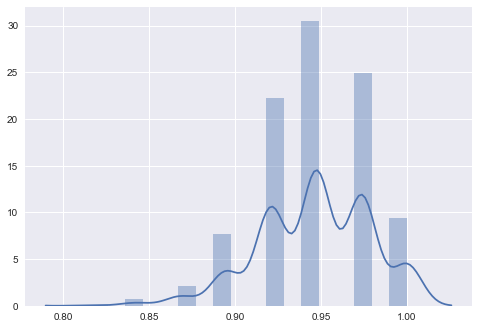

In [15]:
model_accuracy = []

for i in range(1000):
    (training_inputs,
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracy.append(classifier_accuracy)

sb.distplot(model_accuracy)
plt.show()

## cross-validation

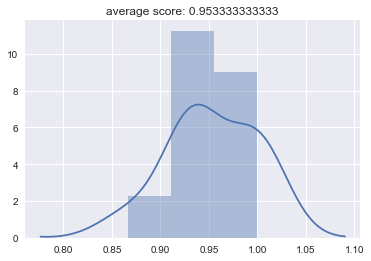

In [19]:
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

cv_scores = cross_val_score(decision_tree_classifier,all_inputs,all_classes,cv=10)
sb.distplot(cv_scores)
plt.title('average score: {}'.format(np.mean(cv_scores)))
plt.show()

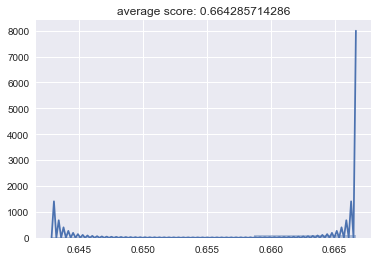

In [20]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier,all_inputs,all_classes,cv=10)

sb.distplot(cv_scores)
plt.title('average score: {}'.format(np.mean(cv_scores)))
plt.show()

In [22]:
# Grid Search for max_depth and max_features

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth':[1,2,3,4,5],
                 'max_features':[1,2,3,4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                          param_grid = parameter_grid,
                          cv = cross_validation)

grid_search.fit(all_inputs, all_classes)

print('best score:{}'.format(grid_search.best_score_))
print ('best parameters: {}'.format(grid_search.best_params_))

best score:0.959731543624
best parameters: {'max_features': 4, 'max_depth': 3}


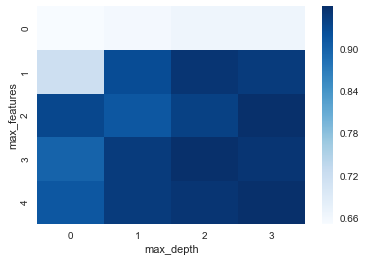

In [30]:
grid_visual = []

for grid_pair in grid_search.grid_scores_:
    grid_visual.append(grid_pair.mean_validation_score)
    
grid_visual = np.array(grid_visual)
grid_visual.shape=(5,4)

sb.heatmap(grid_visual,cmap='Blues')
plt.ylabel('max_features')
plt.xlabel('max_depth')

plt.show()


In [28]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=4, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [33]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'max_features':[1,2,3,4],
                 'n_estimators':[5,10,25,50]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(random_forest_classifier,
                          param_grid = parameter_grid,
                          cv = cross_validation)

grid_search.fit(all_inputs, all_classes)

print('best score:{}'.format(grid_search.best_score_))
print ('best parameters: {}'.format(grid_search.best_params_))

best score:0.96644295302
best parameters: {'max_features': 2, 'n_estimators': 5}


In [38]:
random_forest_classifier.fit(training_inputs,training_classes)

testing_inputs = [[4.0,3.8,1.7,0.3]]

for input_features, prediction, actual in zip(testing_inputs[:1],
                                            random_forest_classifier.predict(testing_inputs[:10]),
                                            testing_classes[:1]):
    print ('{}\t-->\t{}\t(Actual:{})'.format(input_features,prediction,actual))

[4.0, 3.8, 1.7, 0.3]	-->	Iris-setosa	(Actual:Iris-setosa)
